In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv("mnist_train.csv")
print(df.shape)


(42000, 785)


In [13]:
data=df.values
print(data)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [14]:
X=data[:,1:]
Y=data[:,0]

In [16]:
print(X)
print(Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [19]:
print(x_train.shape,x_test.shape)

(33600, 784) (8400, 784)


In [24]:
def draw(sample):
    img=sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
    

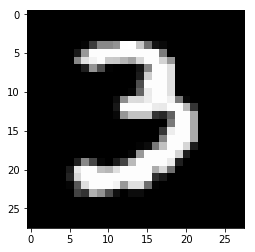

3


In [29]:
draw(X[9])
print(Y[9])

In [33]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint,k=5):
    vals=[]
    m=X.shape[0]
    #print(m)
    
    for i in range(m):
        d=dist(querypoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [34]:
a=knn(x_train,y_train,x_test[0])
print(int(a))

3


# from knn scikit learn

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
y_pred=knn.predict(x_test)

In [38]:
from sklearn import metrics

In [39]:
acc=metrics.accuracy_score(y_pred,y_test)
print(acc)

0.965


In [44]:
yee=knn.predict([x_test[12]])

In [45]:
print(yee)

[3]


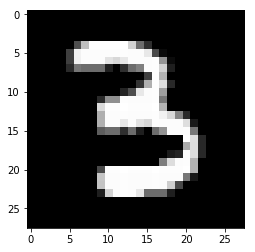

In [48]:
draw(x_test[12])